<h1>Data Analysis and Visualization Home Assignment</h1>
<li>I've tried to outline the steps for you so please make use of the cells
<li>If you run into data size issues, subset your data. But try to use as much as you can get away with
<li>Note that many of the steps will take a while to run, especially if your computer is not powerful enough. Be patient! 


<ol>
<li>Read the data from <b>yellow_tripdata_small_2016-01.csv</b>
<li>Remove any data that is outside the NYC bounding box
<ul>
<li>NYC bounding box: westlimit=-74.2635; southlimit=40.4856; eastlimit=-73.7526; northlimit=40.9596
<li>See http://boundingbox.klokantech.com for info on bounding boxes
</ul>
<li>Calculate taxi trip duration and save in a new column "duration"
<li>Convert duration into a float
<li>Do some basic analysis (see below)
<li>Add a day of week column
<li>Add an hour of day column
<li>Do some analysis (see below)
<li>Divide the data into zones
<ul>
<li>write a function createZoneTable(zone_factor) that divides the bounding box into zones
<li>the idea is to create zone_factor * zone_factor zones
<li>e.g., if zone_factor is 20, you'll create 20*20 = 400 zones
<li>Divide the longitude (-73.7526 to -74.2635) into zone_factor (e.g., 20) sections
<li>Divide the latitude (40.4856 to 40.9596) into zone_factor (e.g., 20) sections
<li>Return a table (a list of lists) containing a zone id, and the coordinates of the zone
<li>(see e.g., below)
</ul>
<li>Write a function get_zone(lon,lat) that figures out the zone given a latitude and longitude
<li>Apply this function to the dataframe, first with pickup lats and longs; then with dropoff lats and longs
<li>This will give two new "pickup_zone" and "dropoff_zone" columns
<li>Do some analysis (see below)
<li>Using folium, draw a heatmap of the number of trips originating in each zone
<ul>
<li>Create a geojson object for all the zones 
<li>Create a df that contains zone numbers and the number of trips originating in each zone
<li>Use folium to create a heatmap
<li><b>OPTIONAL:</b> You'll notice that the bounding box is much larger than New York City. Try to remove every zone that has 0 originating trips from your map. (Hint: You can remove them from the geojson object)


In [219]:
import pandas as pd
import numpy as np
import datetime as dt
pd.options.mode.chained_assignment = None
import geojsonio
import json

<h2>Read the data</h2>


In [220]:
#Add necessary imports and functions to read the data
df = pd.read_csv('yellow_tripdata_small_2016-01.csv')
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,40.752026,1,8.5,0.0,0.5,1.85,0.00,0.3,11.15
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,40.771893,1,6.0,0.0,0.5,1.36,0.00,0.3,8.16
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,40.707985,1,9.0,0.5,0.5,2.00,0.00,0.3,12.30
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,40.779671,1,4.5,0.0,0.5,1.30,0.00,0.3,6.60
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,40.769787,2,13.5,0.0,0.5,0.00,0.00,0.3,14.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090681,2,2016-01-21 07:58:34,2016-01-21 08:10:57,1,1.98,-74.009941,40.720230,1,N,-73.990326,40.731747,1,10.0,0.0,0.5,2.16,0.00,0.3,12.96
1090682,1,2016-01-07 01:15:38,2016-01-07 01:19:36,2,1.10,-73.971550,40.782257,1,N,-73.961464,40.795998,2,5.5,0.5,0.5,0.00,0.00,0.3,6.80
1090683,1,2016-01-09 10:42:32,2016-01-09 10:50:34,2,1.30,-74.000137,40.733067,1,N,-73.999969,40.720318,1,7.5,0.0,0.5,1.65,0.00,0.3,9.95
1090684,1,2016-01-10 15:34:00,2016-01-10 15:56:06,1,8.80,-73.874496,40.774082,1,N,-73.970444,40.795761,1,27.5,0.0,0.5,6.75,5.54,0.3,40.59


<h2>Remove data outside the bounding box</h2>


In [221]:
westlimit=-74.2635; southlimit=40.4856; eastlimit=-73.7526; northlimit=40.9596
#Remove the data that is not within the limits specified above
df =df[(df['pickup_longitude'] >= -74.2635)
                    & (df['dropoff_longitude'] <= -73.7526)
                    & (df['pickup_latitude'] >=40.4856)
                    & (df['dropoff_latitude'] <=40.9596)].copy()
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,40.752026,1,8.5,0.0,0.5,1.85,0.00,0.3,11.15
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,40.771893,1,6.0,0.0,0.5,1.36,0.00,0.3,8.16
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,40.707985,1,9.0,0.5,0.5,2.00,0.00,0.3,12.30
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,40.779671,1,4.5,0.0,0.5,1.30,0.00,0.3,6.60
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,40.769787,2,13.5,0.0,0.5,0.00,0.00,0.3,14.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090681,2,2016-01-21 07:58:34,2016-01-21 08:10:57,1,1.98,-74.009941,40.720230,1,N,-73.990326,40.731747,1,10.0,0.0,0.5,2.16,0.00,0.3,12.96
1090682,1,2016-01-07 01:15:38,2016-01-07 01:19:36,2,1.10,-73.971550,40.782257,1,N,-73.961464,40.795998,2,5.5,0.5,0.5,0.00,0.00,0.3,6.80
1090683,1,2016-01-09 10:42:32,2016-01-09 10:50:34,2,1.30,-74.000137,40.733067,1,N,-73.999969,40.720318,1,7.5,0.0,0.5,1.65,0.00,0.3,9.95
1090684,1,2016-01-10 15:34:00,2016-01-10 15:56:06,1,8.80,-73.874496,40.774082,1,N,-73.970444,40.795761,1,27.5,0.0,0.5,6.75,5.54,0.3,40.59


<h2>Add a column for taxi trip duration</h2>
<li>strptime formats: http://pubs.opengroup.org/onlinepubs/009695399/functions/strptime.html

In [222]:
df['duration']=""
df['tpep_dropoff_datetime'] = df['tpep_dropoff_datetime'].apply(lambda x:dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].apply(lambda x:dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
df['duration'] = df['tpep_dropoff_datetime']- df['tpep_pickup_datetime']
df


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,40.752026,1,8.5,0.0,0.5,1.85,0.00,0.3,11.15,0 days 00:10:57
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,40.771893,1,6.0,0.0,0.5,1.36,0.00,0.3,8.16,0 days 00:06:05
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,40.707985,1,9.0,0.5,0.5,2.00,0.00,0.3,12.30,0 days 00:08:22
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,40.779671,1,4.5,0.0,0.5,1.30,0.00,0.3,6.60,0 days 00:03:14
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,40.769787,2,13.5,0.0,0.5,0.00,0.00,0.3,14.30,0 days 00:22:31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090681,2,2016-01-21 07:58:34,2016-01-21 08:10:57,1,1.98,-74.009941,40.720230,1,N,-73.990326,40.731747,1,10.0,0.0,0.5,2.16,0.00,0.3,12.96,0 days 00:12:23
1090682,1,2016-01-07 01:15:38,2016-01-07 01:19:36,2,1.10,-73.971550,40.782257,1,N,-73.961464,40.795998,2,5.5,0.5,0.5,0.00,0.00,0.3,6.80,0 days 00:03:58
1090683,1,2016-01-09 10:42:32,2016-01-09 10:50:34,2,1.30,-74.000137,40.733067,1,N,-73.999969,40.720318,1,7.5,0.0,0.5,1.65,0.00,0.3,9.95,0 days 00:08:02
1090684,1,2016-01-10 15:34:00,2016-01-10 15:56:06,1,8.80,-73.874496,40.774082,1,N,-73.970444,40.795761,1,27.5,0.0,0.5,6.75,5.54,0.3,40.59,0 days 00:22:06


<h2>Convert duration column into a float (number of seconds)</h2>
<li><span style="color:blue">timedelta64(1, 's')</span> represents one second

In [223]:
df['duration'] =df['duration'].dt.total_seconds().astype(float)
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,40.752026,1,8.5,0.0,0.5,1.85,0.00,0.3,11.15,657.0
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,40.771893,1,6.0,0.0,0.5,1.36,0.00,0.3,8.16,365.0
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,40.707985,1,9.0,0.5,0.5,2.00,0.00,0.3,12.30,502.0
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,40.779671,1,4.5,0.0,0.5,1.30,0.00,0.3,6.60,194.0
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,40.769787,2,13.5,0.0,0.5,0.00,0.00,0.3,14.30,1351.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090681,2,2016-01-21 07:58:34,2016-01-21 08:10:57,1,1.98,-74.009941,40.720230,1,N,-73.990326,40.731747,1,10.0,0.0,0.5,2.16,0.00,0.3,12.96,743.0
1090682,1,2016-01-07 01:15:38,2016-01-07 01:19:36,2,1.10,-73.971550,40.782257,1,N,-73.961464,40.795998,2,5.5,0.5,0.5,0.00,0.00,0.3,6.80,238.0
1090683,1,2016-01-09 10:42:32,2016-01-09 10:50:34,2,1.30,-74.000137,40.733067,1,N,-73.999969,40.720318,1,7.5,0.0,0.5,1.65,0.00,0.3,9.95,482.0
1090684,1,2016-01-10 15:34:00,2016-01-10 15:56:06,1,8.80,-73.874496,40.774082,1,N,-73.970444,40.795761,1,27.5,0.0,0.5,6.75,5.54,0.3,40.59,1326.0


<h2>Remove data where duration is greater than 10000 seconds</h2>

In [224]:
df=df[(df['duration']<=10000.0)]
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,40.752026,1,8.5,0.0,0.5,1.85,0.00,0.3,11.15,657.0
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,40.771893,1,6.0,0.0,0.5,1.36,0.00,0.3,8.16,365.0
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,40.707985,1,9.0,0.5,0.5,2.00,0.00,0.3,12.30,502.0
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,40.779671,1,4.5,0.0,0.5,1.30,0.00,0.3,6.60,194.0
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,40.769787,2,13.5,0.0,0.5,0.00,0.00,0.3,14.30,1351.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090681,2,2016-01-21 07:58:34,2016-01-21 08:10:57,1,1.98,-74.009941,40.720230,1,N,-73.990326,40.731747,1,10.0,0.0,0.5,2.16,0.00,0.3,12.96,743.0
1090682,1,2016-01-07 01:15:38,2016-01-07 01:19:36,2,1.10,-73.971550,40.782257,1,N,-73.961464,40.795998,2,5.5,0.5,0.5,0.00,0.00,0.3,6.80,238.0
1090683,1,2016-01-09 10:42:32,2016-01-09 10:50:34,2,1.30,-74.000137,40.733067,1,N,-73.999969,40.720318,1,7.5,0.0,0.5,1.65,0.00,0.3,9.95,482.0
1090684,1,2016-01-10 15:34:00,2016-01-10 15:56:06,1,8.80,-73.874496,40.774082,1,N,-73.970444,40.795761,1,27.5,0.0,0.5,6.75,5.54,0.3,40.59,1326.0


In [225]:
df.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
count,1.068890e+06,1.068890e+06,1.068890e+06,1.068890e+06,1.068890e+06,1.068890e+06,1.068890e+06,1.068890e+06,1.068890e+06,1.068890e+06,1.068890e+06,1.068890e+06,1.068890e+06,1.068890e+06,1.068890e+06,1.068890e+06,1.068890e+06
mean,1.537481e+00,1.675611e+00,3.473269e+00,-7.397337e+01,4.075106e+01,1.032898e+00,-7.397388e+01,4.075197e+01,1.347043e+00,1.237496e+01,3.132414e-01,4.980031e-01,1.741881e+00,2.905327e-01,2.997729e-01,1.551837e+01,7.884112e+02
std,4.985934e-01,1.330061e+00,6.122778e+02,3.873042e-02,2.840898e-02,3.515686e-01,3.350904e-02,3.330147e-02,4.904511e-01,1.153419e+01,3.658478e-01,3.411471e-02,2.543779e+00,1.607295e+00,1.141813e-02,1.381716e+01,6.120026e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,-7.426302e+01,4.052975e+01,1.000000e+00,-7.515407e+01,2.988659e+01,1.000000e+00,-2.800000e+02,-1.000000e+00,-5.000000e-01,-7.000000e+01,-1.050000e+01,-3.000000e-01,-2.803000e+02,0.000000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00,-7.399165e+01,4.073759e+01,1.000000e+00,-7.399122e+01,4.073635e+01,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.300000e+00,3.810000e+02
50%,2.000000e+00,1.000000e+00,1.670000e+00,-7.398169e+01,4.075443e+01,1.000000e+00,-7.397981e+01,4.075475e+01,1.000000e+00,9.000000e+00,0.000000e+00,5.000000e-01,1.260000e+00,0.000000e+00,3.000000e-01,1.160000e+01,6.270000e+02
75%,2.000000e+00,2.000000e+00,3.060000e+00,-7.396719e+01,4.076844e+01,1.000000e+00,-7.396316e+01,4.076993e+01,2.000000e+00,1.400000e+01,5.000000e-01,5.000000e-01,2.320000e+00,0.000000e+00,3.000000e-01,1.716000e+01,1.009000e+03
max,2.000000e+00,9.000000e+00,6.330083e+05,-6.598666e+01,4.645310e+01,9.900000e+01,-7.375261e+01,4.095958e+01,4.000000e+00,5.000000e+03,4.500000e+00,5.000000e-01,5.500000e+02,8.855900e+02,3.000000e-01,5.000800e+03,9.942000e+03


<h2>Plot duration and compare with a gamma distribution</h2>

If the data does not fit a gamma distribution, compare it to a normal distribution instead

/Users/vriddhimisra/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

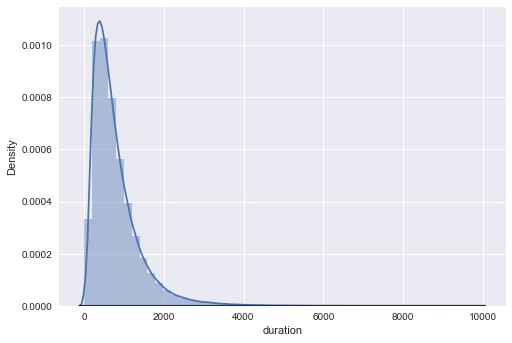

In [111]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import scipy.stats as stats 

sns.distplot(df['duration'],kde=True, fit=stats.gamma)


<h2>Plot the scatter plot between trip_distance and duration</h2>

<AxesSubplot:xlabel='duration', ylabel='trip_distance'>

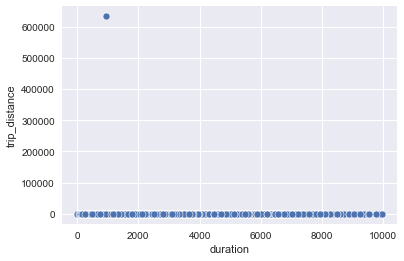

In [226]:
# plt.figure(figsize=(10,10))
# plt.scatter(df.duration,df.trip_distance, color='green')
# plt.xlabel('Duration', fontsize=16)
# plt.ylabel('Trip Distance', fontsize=16)
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)
# plt.xlim(0, 1000)
# plt.ylim(0,45)

# sns.despine()
sns.scatterplot(data=df, x="duration", y="trip_distance")


<h2>As you see above, there are some outliers in the dataset that are probably incorrect. For simplicity, remove these datapoints from the dataset and plot the scatter plot again.</h2>

<AxesSubplot:xlabel='duration', ylabel='trip_distance'>

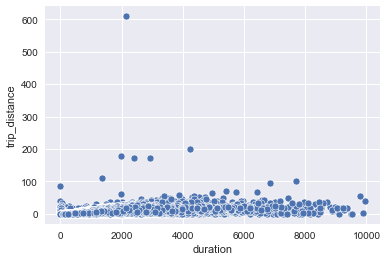

In [227]:
df=df[(df['trip_distance']<600000.0)]
sns.scatterplot(data=df, x="duration", y="trip_distance")

# plt.figure(figsize=(10,10))
# plt.scatter(df.duration,df.trip_distance<, color='green')
# plt.xlabel('Duration', fontsize=16)
# plt.ylabel('Trip Distance', fontsize=16)
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)
# plt.xlim(0, 1000)
# plt.ylim(0,15)

# sns.despine()




<h2>Create a column "day_of_week" that puts in an integer for the weekday</h2>
<li>Monday = 1, Sunday = 7
<li>Investigate here! https://docs.python.org/3/library/datetime.html
<li>Use tpep_pickup_datetime to get the weekday

In [228]:
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,day_of_week
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,...,1,8.5,0.0,0.5,1.85,0.00,0.3,11.15,657.0,0
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,...,1,6.0,0.0,0.5,1.36,0.00,0.3,8.16,365.0,2
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,...,1,9.0,0.5,0.5,2.00,0.00,0.3,12.30,502.0,1
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,...,1,4.5,0.0,0.5,1.30,0.00,0.3,6.60,194.0,6
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,...,2,13.5,0.0,0.5,0.00,0.00,0.3,14.30,1351.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090681,2,2016-01-21 07:58:34,2016-01-21 08:10:57,1,1.98,-74.009941,40.720230,1,N,-73.990326,...,1,10.0,0.0,0.5,2.16,0.00,0.3,12.96,743.0,3
1090682,1,2016-01-07 01:15:38,2016-01-07 01:19:36,2,1.10,-73.971550,40.782257,1,N,-73.961464,...,2,5.5,0.5,0.5,0.00,0.00,0.3,6.80,238.0,3
1090683,1,2016-01-09 10:42:32,2016-01-09 10:50:34,2,1.30,-74.000137,40.733067,1,N,-73.999969,...,1,7.5,0.0,0.5,1.65,0.00,0.3,9.95,482.0,5
1090684,1,2016-01-10 15:34:00,2016-01-10 15:56:06,1,8.80,-73.874496,40.774082,1,N,-73.970444,...,1,27.5,0.0,0.5,6.75,5.54,0.3,40.59,1326.0,6


In [12]:
# df['day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()
# df

<h2>Create time of day buckets using the hour part of tpep_pickup_datetime</h2>
pickup_hour should take values 0 to 23

In [229]:
df['pickup_hour'] = df['tpep_pickup_datetime'].apply(lambda x: x.hour)
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,day_of_week,pickup_hour
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,...,8.5,0.0,0.5,1.85,0.00,0.3,11.15,657.0,0,10
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,...,6.0,0.0,0.5,1.36,0.00,0.3,8.16,365.0,2,10
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,...,9.0,0.5,0.5,2.00,0.00,0.3,12.30,502.0,1,0
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,...,4.5,0.0,0.5,1.30,0.00,0.3,6.60,194.0,6,16
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,...,13.5,0.0,0.5,0.00,0.00,0.3,14.30,1351.0,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090681,2,2016-01-21 07:58:34,2016-01-21 08:10:57,1,1.98,-74.009941,40.720230,1,N,-73.990326,...,10.0,0.0,0.5,2.16,0.00,0.3,12.96,743.0,3,7
1090682,1,2016-01-07 01:15:38,2016-01-07 01:19:36,2,1.10,-73.971550,40.782257,1,N,-73.961464,...,5.5,0.5,0.5,0.00,0.00,0.3,6.80,238.0,3,1
1090683,1,2016-01-09 10:42:32,2016-01-09 10:50:34,2,1.30,-74.000137,40.733067,1,N,-73.999969,...,7.5,0.0,0.5,1.65,0.00,0.3,9.95,482.0,5,10
1090684,1,2016-01-10 15:34:00,2016-01-10 15:56:06,1,8.80,-73.874496,40.774082,1,N,-73.970444,...,27.5,0.0,0.5,6.75,5.54,0.3,40.59,1326.0,6,15


<h2>Plot a bar graph that groups the data by day of week and then by time of day</h2>
The result should be a single plot with day_of_week on the x-axis and count of records on the y-axis. Different colors are used to distinguish different pickup_hour in the legend.
<li>Do you notice any differences?</li>

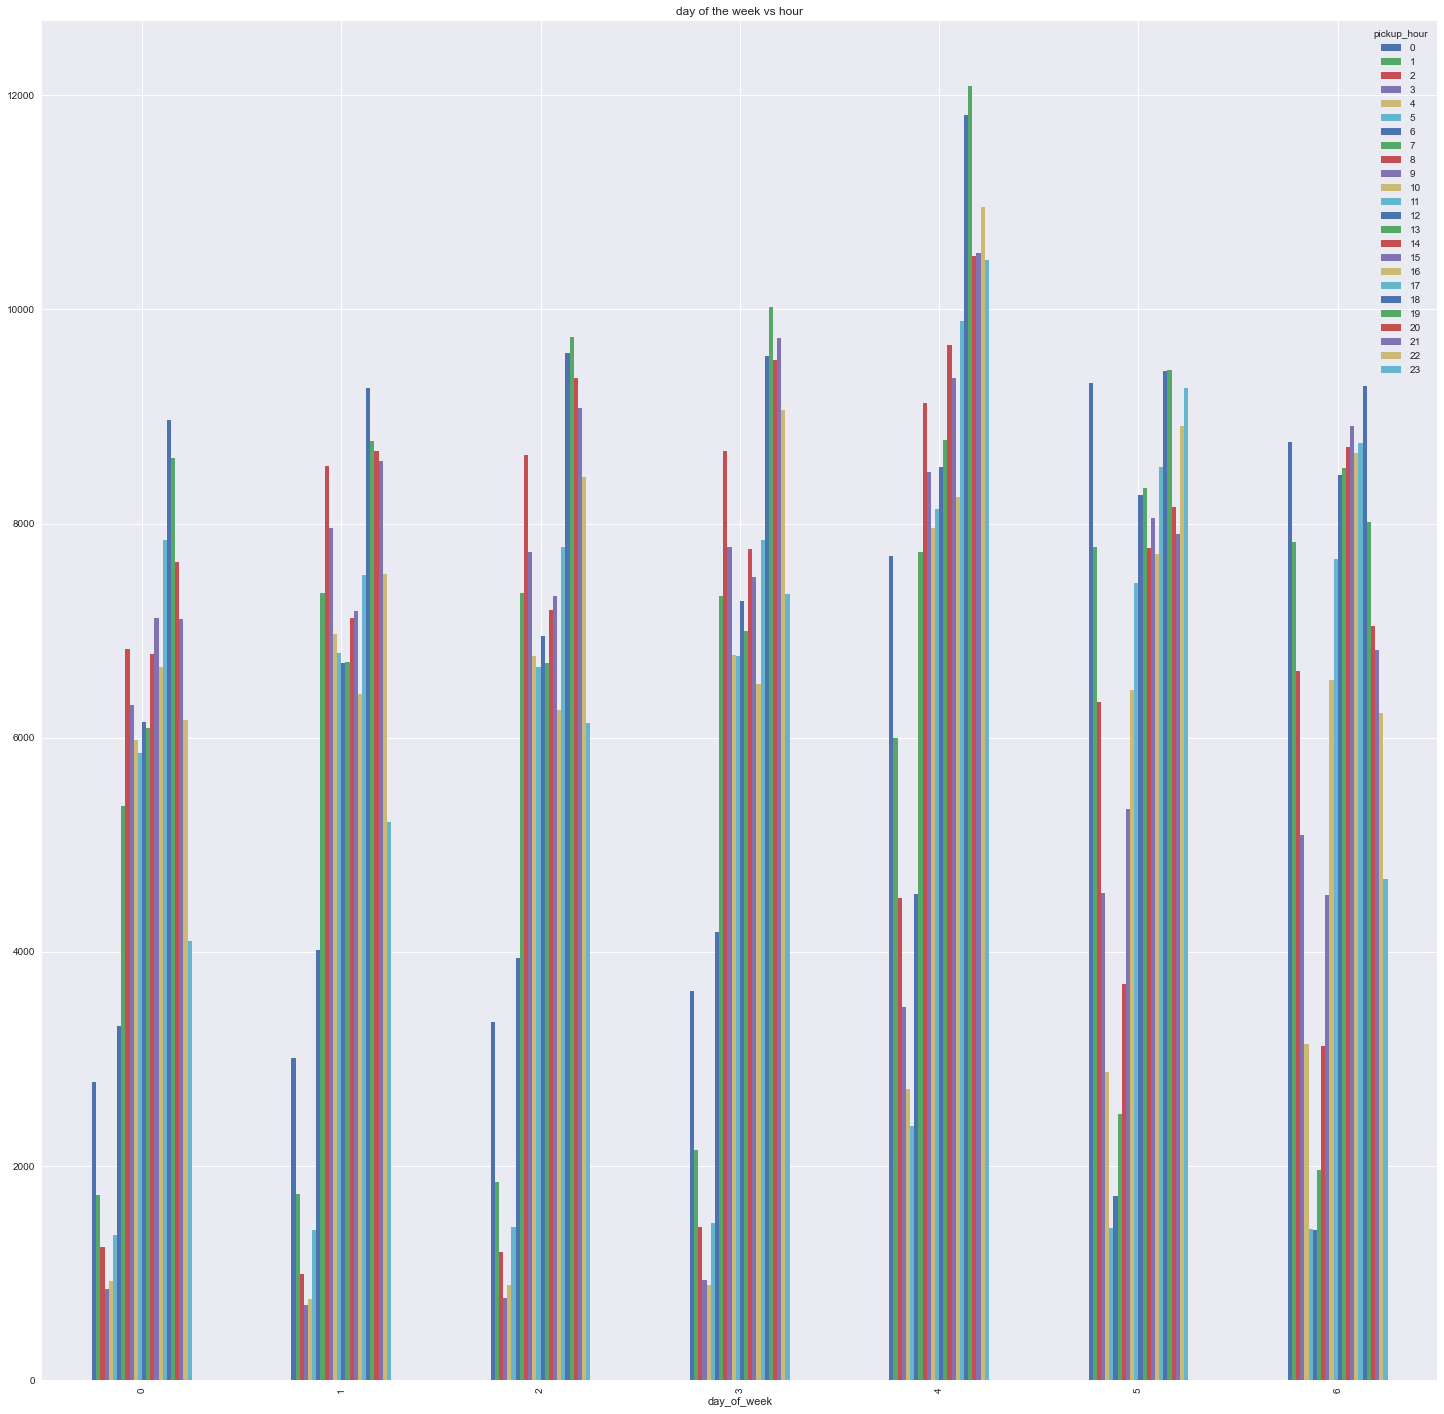

In [230]:
day_hour = df.groupby(['day_of_week', 'pickup_hour']).size().unstack().plot(kind='bar',title="day of the week vs hour",figsize=(25,25))


<h2>Create zones</h2>
Each rectangular zone is associated with a list of 5 coordinates. 

Hints:
- The first coordinate corresponds to the bottom left edge of the zone
- The second coordinate corresponds to the bottom right edge
- The third coordinate corresponds to the top right edge
- The fourth coordinate corresponds to the top left edge
- The final coordinate corresponds to the bottom left edge again

In [15]:
# def createZoneTable(zone_factor,westlimit=-74.2635, southlimit=40.4856, eastlimit=-73.7526, northlimit=40.9596):
#     zone_table = list()
    

#     return zone_table

In [16]:
# Divide the data into zones
# write a function createZoneTable(zone_factor) that divides the bounding box into zones
# the idea is to create zone_factor * zone_factor zones
# e.g., if zone_factor is 20, you'll create 20*20 = 400 zones
# Divide the longitude (-73.7526 to -74.2635) into zone_factor (e.g., 20) sections
# Divide the latitude (40.4856 to 40.9596) into zone_factor (e.g., 20) sections
# Return a table (a list of lists) containing a zone id, and the coordinates of the zone
# (see e.g., below)

In [270]:
def createZoneTable(zone_factor,westlimit=-74.2635, southlimit=40.4856, eastlimit=-73.7526, northlimit=40.9596):
    zone_table = list()
    zone_longitudes=np.linspace(westlimit,eastlimit,zone_factor+1)
    zone_latitudes=np.linspace(southlimit,northlimit,zone_factor+1)
    zone_ids=np.arange(0,zone_factor^2)
    w=[]
    x=[]
    y=[]
    z=[]
    for i in range(0,zone_factor):
        for j in range(0,zone_factor):
            w=[zone_longitudes[j],zone_latitudes[i]]
            x=[zone_longitudes[j+1],zone_latitudes[i]]
            y=[zone_longitudes[j+1],zone_latitudes[i+1]]
            z=[zone_longitudes[j],zone_latitudes[i+1]]
            zone_table.append((f'{len(zone_table):02}',[w,x,y,z]))
    

    return zone_table

createZoneTable(zone_factor=20,westlimit=-74.2635, southlimit=40.4856, eastlimit=-73.7526, northlimit=40.9596)

[('00',
  [[-74.2635, 40.4856],
   [-74.237955, 40.4856],
   [-74.237955, 40.509299999999996],
   [-74.2635, 40.509299999999996]]),
 ('01',
  [[-74.237955, 40.4856],
   [-74.21240999999999, 40.4856],
   [-74.21240999999999, 40.509299999999996],
   [-74.237955, 40.509299999999996]]),
 ('02',
  [[-74.21240999999999, 40.4856],
   [-74.186865, 40.4856],
   [-74.186865, 40.509299999999996],
   [-74.21240999999999, 40.509299999999996]]),
 ('03',
  [[-74.186865, 40.4856],
   [-74.16131999999999, 40.4856],
   [-74.16131999999999, 40.509299999999996],
   [-74.186865, 40.509299999999996]]),
 ('04',
  [[-74.16131999999999, 40.4856],
   [-74.135775, 40.4856],
   [-74.135775, 40.509299999999996],
   [-74.16131999999999, 40.509299999999996]]),
 ('05',
  [[-74.135775, 40.4856],
   [-74.11023, 40.4856],
   [-74.11023, 40.509299999999996],
   [-74.135775, 40.509299999999996]]),
 ('06',
  [[-74.11023, 40.4856],
   [-74.084685, 40.4856],
   [-74.084685, 40.509299999999996],
   [-74.11023, 40.509299999999

Calling the function createZoneTable(zone_factor=20,westlimit=-74.2635, southlimit=40.4856, eastlimit=-73.7526, northlimit=40.9596) should yield result:

[('00',
  [[-74.2635, 40.4856],
   [-74.237955, 40.4856],
   [-74.237955, 40.509299999999996],
   [-74.2635, 40.509299999999996],
   [-74.2635, 40.4856]]),
 ('01',
  [[-74.237955, 40.4856],
   [-74.21241, 40.4856],
   [-74.21241, 40.509299999999996],
   [-74.237955, 40.509299999999996],
   [-74.237955, 40.4856]]),
 ('02',
  [[-74.21240999999999, 40.4856],
   [-74.186865, 40.4856],
   [-74.186865, 40.509299999999996],
   [-74.21240999999999, 40.509299999999996],
   [-74.21240999999999, 40.4856]]),...

<h2>Now, create a GeoJsonObject using the zones defined in the zone table</h2>
The zone_ids should run from '00' to '399'. 

Hints:
- The bottom left zone is '00'
- The bottom right zone is '19'
- The left-most zone in the second row from the bottom is '20'
- The right-most zone in the second row from the bottom is '39'
- The top left zone is '380'
- The top right zone is '399'

In [287]:
def createGeoJsonObject(zone_table):
    zone_data_dict = dict()
    zone_data_dict['type'] = 'FeatureCollection'
    zone_data_dict_features = list()
    for i in range(len(zone_table)):
        data_point={
                    "geometry": {"coordinates":zone_table[i][1:],
                                 "type":"Polygon"},
                    "properties":{"zone_id":zone_table[i][0]
                                 },
                    "type": "Feature"
            
        }
        zone_data_dict_features.append(data_point)
    zone_data_dict['features']=zone_data_dict_features

    return zone_data_dict

<h3>Create the zone table for zone_factor = 20</h3>

In [281]:
zone_table = createZoneTable(20,westlimit=-74.2635, southlimit=40.4856, eastlimit=-73.7526, northlimit=40.9596)


In [288]:
createGeoJsonObject(zone_table)

{'type': 'FeatureCollection',
 'features': [{'geometry': {'coordinates': ([[-74.2635, 40.4856],
      [-74.237955, 40.4856],
      [-74.237955, 40.509299999999996],
      [-74.2635, 40.509299999999996]],),
    'type': 'Polygon'},
   'properties': {'zone_id': '00'},
   'type': 'Feature'},
  {'geometry': {'coordinates': ([[-74.237955, 40.4856],
      [-74.21240999999999, 40.4856],
      [-74.21240999999999, 40.509299999999996],
      [-74.237955, 40.509299999999996]],),
    'type': 'Polygon'},
   'properties': {'zone_id': '01'},
   'type': 'Feature'},
  {'geometry': {'coordinates': ([[-74.21240999999999, 40.4856],
      [-74.186865, 40.4856],
      [-74.186865, 40.509299999999996],
      [-74.21240999999999, 40.509299999999996]],),
    'type': 'Polygon'},
   'properties': {'zone_id': '02'},
   'type': 'Feature'},
  {'geometry': {'coordinates': ([[-74.186865, 40.4856],
      [-74.16131999999999, 40.4856],
      [-74.16131999999999, 40.509299999999996],
      [-74.186865, 40.50929999999999

Calling the function createGeoJsonObject(zone_table) should yield result:

{'type': 'FeatureCollection',
 'features': [{'geometry': {'coordinates': [[[-74.2635, 40.4856],
      [-74.237955, 40.4856],
      [-74.237955, 40.509299999999996],
      [-74.2635, 40.509299999999996],
      [-74.2635, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '00'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.237955, 40.4856],
      [-74.21241, 40.4856],
      [-74.21241, 40.509299999999996],
      [-74.237955, 40.509299999999996],
      [-74.237955, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '01'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.21240999999999, 40.4856],
      [-74.186865, 40.4856],
      [-74.186865, 40.509299999999996],
      [-74.21240999999999, 40.509299999999996],
      [-74.21240999999999, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '02'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.186865, 40.4856],
      [-74.16132, 40.4856],
      [-74.16132, 40.509299999999996],
      [-74.186865, 40.509299999999996],
      [-74.186865, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '03'},
   'type': 'Feature'},... ... ...,
   {'geometry': {'coordinates': [[[-73.80369, 40.935900000000004],
      [-73.77814500000001, 40.935900000000004],
      [-73.77814500000001, 40.9596],
      [-73.80369, 40.9596],
      [-73.80369, 40.935900000000004]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '398'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-73.778145, 40.935900000000004],
      [-73.7526, 40.935900000000004],
      [-73.7526, 40.9596],
      [-73.778145, 40.9596],
      [-73.778145, 40.935900000000004]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '399'},
   'type': 'Feature'}]}

<h2>Write a function that returns a zone number given a latitude and a longitude</h2>

<li>The function should return a string zone number
<li>For the example, <span style="color:blue">get_zone(-74.19,40.65)</span> the function should return "122" (for a zone factor of 20, assuming you have numbered the zones from "0" to "399")

In [244]:
def get_zone(lon,lat,zone_table):
    zone=''
    for i in zone_table:
        if lon>i[1][0][0] and lon<i[1][1][0] and lat>i[1][0][1] and lat<i[1][2][1]:
            zone=i[0]  
            break
    return zone



In [245]:
get_zone(-74.19,40.65,zone_table)

'122'

<h2>Create  pickup_zone and dropoff_zone columns for the dataframe</h2>
<li>This is a little tricky
<li>Pandas 'apply' function applies a function to each row in turn


<h4>Hint on how to apply a function to 2 columns in a dataframe</h4>

df.apply(foo)<br>
translates to<br>
foo(row1)<br>
foo(row2)<br>
foo(row3)<br>
i.e., the table row is the implicit argument of foo.
<p>
If we want to write our own foo, the argument to foo will be a dataframe row.<p>
From this row, we can extract the values we want and pass it to the explicit arguments of foo
<p>


In [246]:
import pandas as pd
df_sample = pd.DataFrame([[1,5,7],[2,4,6],[3,9,2]],columns=['A','B','C'])

print(df_sample)
def foo(x,y):
    return x+y

df_sample['new_col'] = df_sample.apply(lambda x: foo(x['A'],x['B']),axis=1)
#axis = 1 means extract data from rows of the dataframe. by default, it extracts from columns. (Set axis to 0 and see what happens)

df_sample

   A  B  C
0  1  5  7
1  2  4  6
2  3  9  2


,A,B,C,new_col
0,1,5,7,6
1,2,4,6,6
2,3,9,2,12


In [247]:
df['pickup_zone'] = df.apply(lambda x: get_zone(x['pickup_longitude'],x['pickup_latitude'] ,zone_table),axis=1)
df['dropoff_zone'] = df.apply(lambda x: get_zone( x['dropoff_longitude'],x['dropoff_latitude'], zone_table),axis=1)

In [248]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,day_of_week,pickup_hour,pickup_zone,dropoff_zone
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,...,0.5,1.85,0.00,0.3,11.15,657.0,0,10,231,230
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,...,0.5,1.36,0.00,0.3,8.16,365.0,2,10,252,251
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,...,0.5,2.00,0.00,0.3,12.30,502.0,1,0,209,189
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,...,0.5,1.30,0.00,0.3,6.60,194.0,6,16,251,252
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,...,0.5,0.00,0.00,0.3,14.30,1351.0,1,11,231,231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090681,2,2016-01-21 07:58:34,2016-01-21 08:10:57,1,1.98,-74.009941,40.720230,1,N,-73.990326,...,0.5,2.16,0.00,0.3,12.96,743.0,3,7,189,210
1090682,1,2016-01-07 01:15:38,2016-01-07 01:19:36,2,1.10,-73.971550,40.782257,1,N,-73.961464,...,0.5,0.00,0.00,0.3,6.80,238.0,3,1,251,271
1090683,1,2016-01-09 10:42:32,2016-01-09 10:50:34,2,1.30,-74.000137,40.733067,1,N,-73.999969,...,0.5,1.65,0.00,0.3,9.95,482.0,5,10,210,190
1090684,1,2016-01-10 15:34:00,2016-01-10 15:56:06,1,8.80,-73.874496,40.774082,1,N,-73.970444,...,0.5,6.75,5.54,0.3,40.59,1326.0,6,15,255,271


<h2>Calculate the following</h2>
<li>Percentage of the total rides where the pickup zone is the same as the dropoff zone
<li>Zone with the highest number of pickups
<li>Zone with the highest number of dropoffs

In [249]:
percentage=(len(df[(df['pickup_zone']==df['dropoff_zone'])])/len(df))*100
percentage

23.665974670896603

In [250]:
highest_pickup_zone=df.groupby('pickup_zone').count().reset_index()
highest_pickup_zone.loc[highest_pickup_zone['dropoff_zone']==highest_pickup_zone['dropoff_zone'].max(),'pickup_zone'].values[0]

'231'

In [251]:
highest_dropoff_zone=df.groupby('dropoff_zone').count().reset_index()
highest_dropoff_zone.loc[highest_dropoff_zone['pickup_zone']==highest_dropoff_zone['pickup_zone'].max(),'dropoff_zone'].values[0]

'231'

<h2>Groupby analysis</h2>
<li>Group data by the hour of the day and by the pickup zone
<li>Draw a figure of 24 plots that show the top 5 pickup zones at each hour


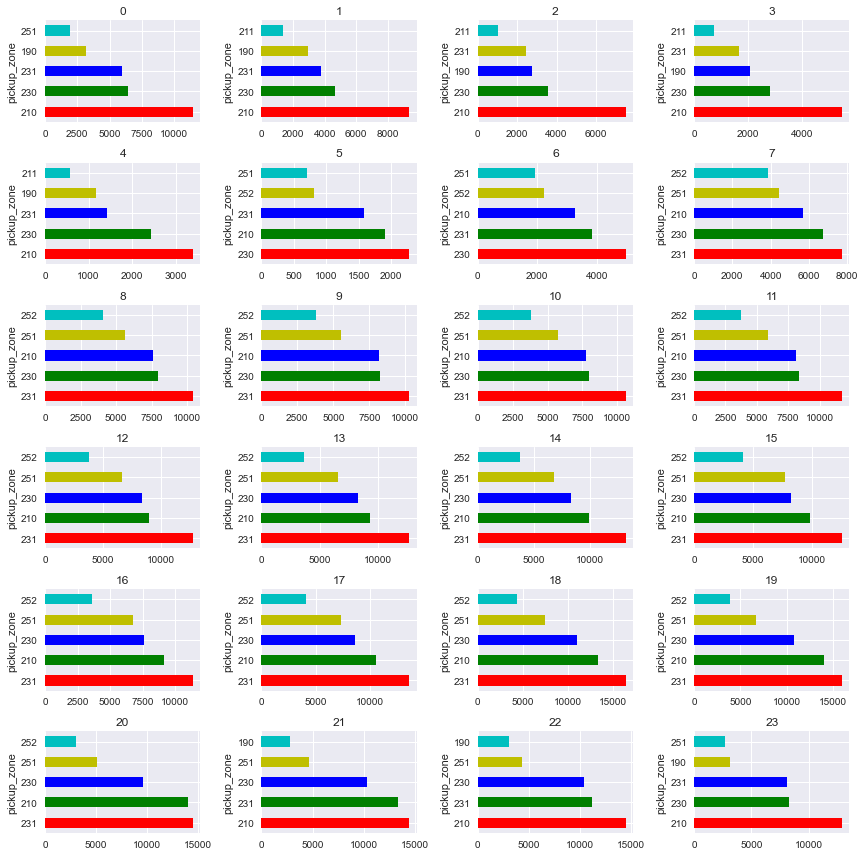

In [252]:
hour_pickupzone = df.groupby(['pickup_hour', 'pickup_zone']).size().unstack(level=0)
hour_pickupzone.apply(lambda x: x.index)

%matplotlib inline
COL_NUM = 4
ROW_NUM = 6
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))

colors = ['r','g','b','y','c']
for i, (hour, zone_count) in enumerate(hour_pickupzone.items()): 
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    zone_count = zone_count.sort_values(ascending=False)[:5] 
    zone_count.plot(kind='barh', ax=ax, color=colors)
    ax.set_title(hour)

plt.tight_layout() 


<h2>Groupby analysis 2</h2>
<li>Group data by the weekday and the pickup zone
<li>Draw a figure of 7 plots that show the top 5 pickup zones on each day

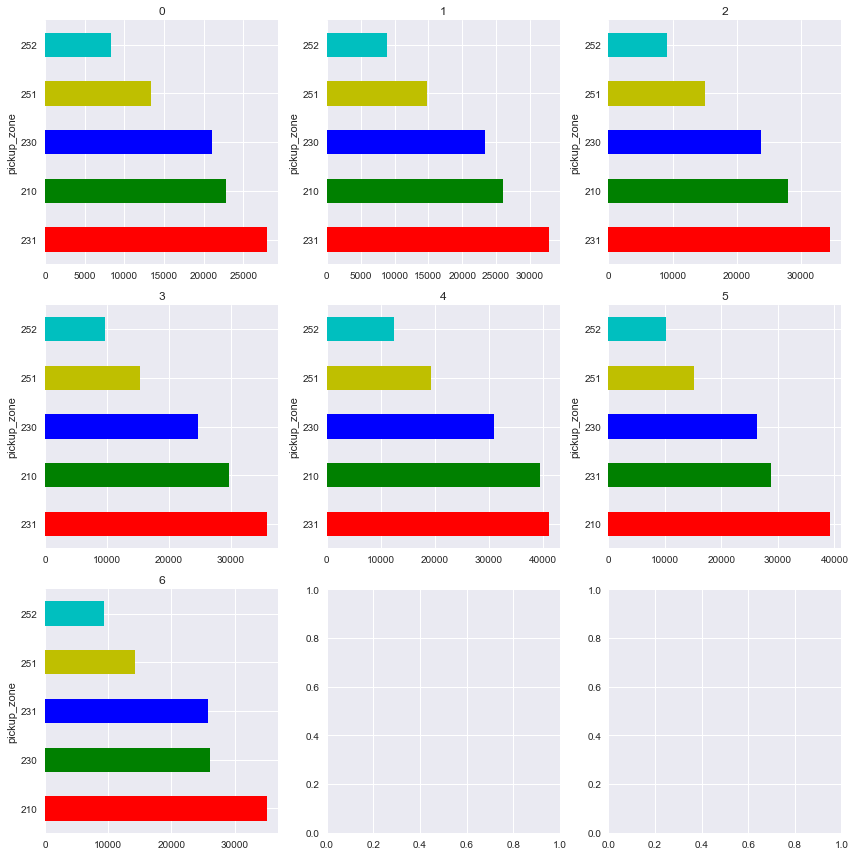

In [253]:
weekday_pickupzone = df.groupby(['day_of_week', 'pickup_zone']).size().unstack(level=0)
weekday_pickupzone.apply(lambda x: x.index)

%matplotlib inline
COL_NUM = 3
ROW_NUM = 3
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))

colors = ['r','g','b','y','c']
for i, (weekday, zone_count) in enumerate(weekday_pickupzone.items()): 
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    zone_count = zone_count.sort_values(ascending=False)[:5] 
    zone_count.plot(kind='barh', ax=ax, color=colors)
    ax.set_title(weekday)

plt.tight_layout() 


<h1>Most frequent morning pickups</h1>
<li>Identify the most frequent pickup zone between 8 am and 9 am on a weekday (i.e. Monday to Friday)

In [254]:
df['dropoff_hour'] = df['tpep_dropoff_datetime'].apply(lambda x: x.hour)
freq_pickups=df[(df['pickup_hour']>=8)&(df['dropoff_hour']<=9)&(df['day_of_week']>0)&(df['day_of_week']<=5) ]
highest_zone=(freq_pickups.groupby('pickup_zone').count().reset_index().sort_values('dropoff_zone',ascending=False)).iloc[0][0]
print(highest_zone)

231


<h2>Create a pickup counts dataframe</h2>
<li>The dataframe should have 2 columns - pickup_zone and pickup_count. For clarity, pickup_count is the total count of pickups from the corresponding pickup_zone in the dataset. 

In [255]:
pickup_counts=pd.DataFrame(df.groupby('pickup_zone').count()['dropoff_zone']).reset_index()
pickup_counts=pickup_counts.rename(columns={'dropoff_zone':'pickup_count'})
pickup_counts

,pickup_zone,pickup_count
0,,21
1,104,1
2,106,1
3,107,1
4,108,5
...,...,...
204,93,2
205,94,1
206,97,1
207,98,4


<h2>Mapping</h2>
<li>Draw a folium map using the polygon geojson object and the pickup counts dataframe. (see class example) 

In [260]:
import folium


In [289]:
data_table=createGeoJsonObject(zone_table)

m = folium.Map(location = [40.7589,-73.9851],zoom_start=15)

m.choropleth(geo_data=data_table, data=pickup_counts,
             columns=['pickup_zone','pickup_count'],
             key_on='feature.properties.zone_id',
             fill_color='RdYlGn', fill_opacity=0.7, line_opacity=0.8,
             legend_name='Pickup Zones and Count')
folium.LayerControl().add_to(m)

m

<h2>Optional question: Remove every zone that has 0 originating trips</h2>